# Harry Potter Species Analysis
In this notebook, we will fetch data from the Harry Potter API and analyze the most common species found in the Harry Potter universe.

We will:
1. Fetch data from the Harry Potter API.
2. Clean the data and handle missing species information by marking them as "Unknown."
3. Visualize the species distribution using a horizontal bar plot.
4. Display the total number of characters in the dataset.

# Importing necessary libraries
We start by importing the required libraries for this project:
- `requests`: To fetch data from the Harry Potter API.
- `pandas`: For data manipulation and converting the API response into a DataFrame.
- `matplotlib` and `seaborn`: For creating visualizations (plots).
- `os`: For file system operations such as creating a folder to save the plot.


In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Creating a folder for saving the plot
We create a folder named `Visuals` to save the plot of the species distribution. 
This step ensures that the folder exists before we attempt to save any plots.


In [2]:
# Create Visuals folder if not exists
os.makedirs('Visuals', exist_ok=True)

# Fetching data from the Harry Potter API
Here, we fetch the character data from the Harry Potter API. If the request is successful (status code 200), we process the JSON data and convert it into a pandas DataFrame. 
If the request fails, we will receive a message saying "Failed to fetch data from the API."


In [3]:
# Fetch data from the Harry Potter API
url = "https://hp-api.onrender.com/api/characters"
response = requests.get(url)

# If the request is successful, process the data
if response.status_code == 200:
    data = response.json()  # Get data as JSON
    df = pd.DataFrame(data)  # Convert data to DataFrame
else:
    print("Failed to fetch data from the API.")

# Data Processing
In this cell, we clean the data:
1. We replace missing species values with "Unknown" so that no rows are dropped due to missing information.
2. We create a new DataFrame (`df_cleaned`) that only contains the 'species' column, as the 'name' column isn't needed for plotting.
3. We count how many characters belong to each species and store this information in `species_counts`.
4. We calculate the total number of characters in the dataset and store it in `total_characters`.


In [4]:
# Replace missing 'species' with 'Unknown' instead of removing them
df['species'] = df['species'].fillna('Unknown')  # Updated to avoid inplace=True

# Keep only 'species' column since 'name' is not needed for the plot
df_cleaned = df[['species']]

# Count how many characters there are in each species
species_counts = df_cleaned['species'].value_counts()

# Total number of characters in the dataset
total_characters = len(df_cleaned)

#  Plotting the Most Common Species
In this cell, we create a horizontal bar plot that shows the most common species in the Harry Potter universe. 
We use `sns.barplot` to create the plot, with the species counts on the x-axis and species names on the y-axis.

We also add the total number of characters to the plot as text, located at the top-right corner.


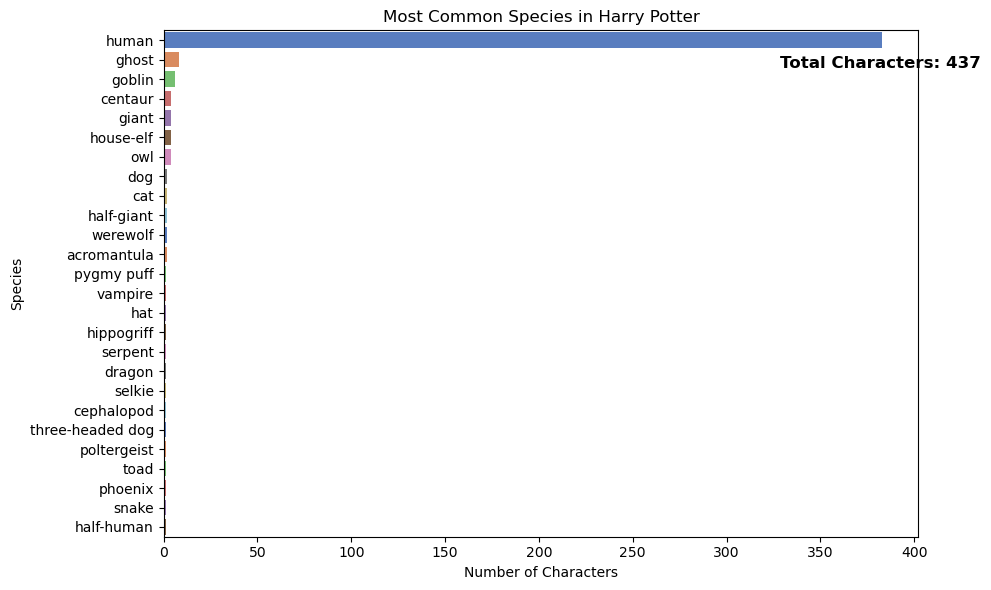

In [5]:
# Plot the results
plt.figure(figsize=(10, 6))
sns.barplot(x=species_counts.values, y=species_counts.index, hue=species_counts.index, palette='muted', orient='h', legend=False)  # Updated seaborn warning
plt.title('Most Common Species in Harry Potter')
plt.xlabel('Number of Characters')
plt.ylabel('Species')

# Add text for the total character count on the plot
plt.text(0.95, 0.95, f'Total Characters: {total_characters}', 
         ha='center', va='top', transform=plt.gca().transAxes,
         fontsize=12, color='black', weight='bold')

# Save the plot in 'Visuals' folder
plt.tight_layout()
plt.savefig('Visuals/most_common_species.png')

# Display Success Message
After successfully creating and saving the plot, we print a success message indicating the plot has been saved in the `Visuals` folder.


In [6]:
print("✅ The plot has been saved in the 'Visuals' folder.")

✅ The plot has been saved in the 'Visuals' folder.


# Conclusion
We fetched data from the Harry Potter API, cleaned the data by handling missing species information, and visualized the most common species in the Harry Potter universe.

The generated plot was saved to the 'Visuals' folder, and you can access it from there.
